# Titanic - Machine Learning from Disaster

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Explore the dataframe

In [4]:
# Data frame.
df = pd.read_csv('train.csv', sep=',')

# Drop id, name columns.
df = df.drop(columns=["PassengerId", "Name"], axis=1)

print("Dataset shape =", df.shape)
print(df.describe())

print("\n\nFirst 10 samples in the dataset:\n\n", df.head(10))

Dataset shape = (891, 10)
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


First 10 samples in the dataset:

    Survived  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0         0       3    male  22.0      1      0         A/5 21171   7.2500   
1         1       1  female  38.0      1      0          PC 17599  71.2833   
2

In [5]:
# Define a function to compute the sum of ASCII values of a string
def ascii_sum(s):
    return sum(ord(char) for char in str(s))

def transform_ticket(pclass, ticket):
    # Convert ticket to string and split into pieces
    parts = str(ticket).split()
    if len(parts) >= 2:
        first_part, last_part = parts[0], parts[-1]
    elif len(parts) == 1:
        first_part, last_part = "", parts[0]
    else:
        return np.nan  # Handle empty or invalid cases
    
    # Convert the first part to a string of ASCII values
    ascii_part = str(ascii_sum(first_part))
    ascii_part = ascii_part if ascii_part != "0" else ""
    
    # Concatenate the ASCII part and the last part
    new_value = ascii_part + last_part

    if pclass == 1:
        new_value = str(100) + new_value
    elif pclass == 2:
        new_value = str(10) + new_value
    
    # Return the integer value of the resulting string
    try:
        return int(new_value)
    except ValueError:
        return 0

print(df[["Pclass", "Ticket"]].head(10))
print()
print(df.apply(lambda row: transform_ticket(row["Pclass"], row["Ticket"]), axis=1).head(10))

   Pclass            Ticket
0       3         A/5 21171
1       1          PC 17599
2       3  STON/O2. 3101282
3       1            113803
4       3            373450
5       3            330877
6       1             17463
7       3            349909
8       3            347742
9       2            237736

0       16521171
1    10014717599
2     5463101282
3      100113803
4         373450
5         330877
6       10017463
7         349909
8         347742
9       10237736
dtype: int64


In [6]:
#df["Ticket"] = df["Ticket"].apply(transform_ticket)
#df["Ticket"] = df.apply(lambda row: transform_ticket(row["Pclass"], row["Ticket"]), axis=1)

## Which feature should we keep/which one should we remove?

In [7]:
# Drop the cabin clumn: too many missing values.
print("Tot missing cabin info:", df['Cabin'].isna().sum())
df = df.drop(columns=["Cabin"], axis=1)

Tot missing cabin info: 687


In [11]:
# Drop also the ticket.
print("Tot missing ticket info:", df['Ticket'].isna().sum())
df = df.drop(columns=["Ticket"], axis=1)

Tot missing ticket info: 0


In [14]:
# Missing values.
print("Missing values for each column\n")
print(df.isna().sum())

Missing values for each column

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [16]:
# We need to manage missing data.

# Fill missing ages with the median value.
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked values with 'S'.
df['Embarked'] = df ['Embarked'].fillna('S')
print(df.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [17]:
# Define X and Y sets.
X = df.drop(columns=["Survived"], axis=1)
Y = df["Survived"]

print("Tot number of samples:", X.shape[0])
features_names = list(X.columns)
print("Features names:", features_names)

X = X.values
Y = Y.values
print("X shape:", X.shape)
print("Y shape:", Y.shape)

Tot number of samples: 714
Features names: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X shape: (714, 7)
Y shape: (714,)


## Encode categorical variable

In [21]:
# Print the data type of each column.
for index_col, name_col in zip(range(X.shape[1]), features_names):
    print(f"Column {name_col} (index: {index_col}) -- data type: {type(X[0, index_col])}")

Column Pclass (index: 0) -- data type: <class 'int'>
Column Sex (index: 1) -- data type: <class 'float'>
Column Age (index: 2) -- data type: <class 'float'>
Column SibSp (index: 3) -- data type: <class 'int'>
Column Parch (index: 4) -- data type: <class 'int'>
Column Fare (index: 5) -- data type: <class 'float'>
Column Embarked (index: 6) -- data type: <class 'float'>


In [22]:
# Encode the categorical variables.
from sklearn.preprocessing import OrdinalEncoder

# Sex and Embarked columns need to be encoded.
to_encode = [1, 6] 

# Define the encode and encode the specified columns.
enc = OrdinalEncoder()
X[:, to_encode] = enc.fit_transform(X[:, to_encode])

In [23]:
# Print the data type of each column.
for index_col, name_col in zip(range(X.shape[1]), features_names):
    print(f"Column {name_col} (index: {index_col}) -- data type: {type(X[0, index_col])}")

Column Pclass (index: 0) -- data type: <class 'int'>
Column Sex (index: 1) -- data type: <class 'float'>
Column Age (index: 2) -- data type: <class 'float'>
Column SibSp (index: 3) -- data type: <class 'int'>
Column Parch (index: 4) -- data type: <class 'int'>
Column Fare (index: 5) -- data type: <class 'float'>
Column Embarked (index: 6) -- data type: <class 'float'>


## Split data into train/validation and test

In [25]:
# Split data.
m = X.shape[0]
m_train = int(3./5. * m)
m_val = int((m - m_train) / 2.)
m_test = m - m_train - m_val

print("Amount of data for training set:", m_train)
print("Amount of data for validation set", m_val)
print("Amount of data for test set:", m_test)

Amount of data for training set: 428
Amount of data for validation set 143
Amount of data for test set: 143


In [26]:
from sklearn.model_selection import train_test_split

# Transform all samples into vector of folat values.
X = np.array(X, dtype=np.float32)

# Split into train_val and test.
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=m_test/m, random_state=12)

# Split into train and val.
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=m_val/(m_train + m_val), random_state=12)

# Check size of sets.
print("Training size:", X_train.shape[0])
print("Validation size:", X_val.shape[0])
print("Training and validation size:", X_train_val.shape[0])
print("Test size:", X_test.shape[0])

Training size: 428
Validation size: 143
Training and validation size: 571
Test size: 143


## Data Standardization

In [28]:
from sklearn.preprocessing import StandardScaler

# Fare column need to be scaled.
to_scale = [5]

# Create a copy for each set.
X_train_scaled = np.copy(X_train)
X_test_scaled = np.copy(X_test)
X_val_scaled = np.copy(X_val)
X_train_val_scaled = np.copy(X_train_val)

# Scale data.
scaler = StandardScaler().fit(X_train[:, to_scale])
X_train_scaled[:, to_scale] = scaler.transform(X_train[:, to_scale])
X_test_scaled[:, to_scale] = scaler.transform(X_test[:, to_scale])
X_val_scaled[:, to_scale] = scaler.transform(X_val[:, to_scale])
X_train_val_scaled[:, to_scale] = scaler.transform(X_train_val[:, to_scale])

In [47]:
from sklearn.model_selection import KFold
from itertools import product

def k_fold_cross_validation(X, Y, model_func, num_folds = 10, verbose=False, **param_grid):

    # -- grid of hyperparams into list
    param_keys = list(param_grid.keys())
    param_values = list(param_grid.values())
    
    # Generate Cartesian product of values
    combinations = product(*param_values)
    
    # Create a list of dictionaries from combinations
    param_list = [dict(zip(param_keys, combination)) for combination in combinations]

    kf = KFold(n_splits = num_folds)
    
    err_validation_kfold = np.zeros(len(param_list),)
    err_training_kfold = np.zeros(len(param_list),)

    for i, params in enumerate(param_list):

        model = model_func(**params)

        for train_index, validation_index in kf.split(X):
            X_train_kfold, X_val_kfold = X[train_index], X[validation_index]
            Y_train_kfold, Y_val_kfold = Y[train_index], Y[validation_index]
            
            # -- data scaling: standardize features with respect to the current folds
            scaler_kfold = StandardScaler().fit(X_train_kfold)
            X_train_kfold_scaled = scaler_kfold.transform(X_train_kfold)
            X_val_kfold_scaled = scaler_kfold.transform(X_val_kfold)
        
            # -- learn the model using the training data from the k-fold
            model.fit(X_train_kfold_scaled, Y_train_kfold)
            
            # -- incremental mean
            err_training_kfold[i] += (1.0 - model.score(X_train_kfold_scaled, Y_train_kfold))
            err_validation_kfold[i] += (1.0 - model.score(X_val_kfold_scaled, Y_val_kfold))

    
    # -- compute the mean
    err_training_kfold /= num_folds
    err_validation_kfold /= num_folds
    
    # -- choose the best paramter: the one that minimizes the (the estimation of the true) loss
    best_param = param_list[np.argmin(err_validation_kfold)]

    if verbose:
        print("Optimal paramters:", best_param)
        print("Min validation error", np.min(err_validation_kfold))
    
    return best_param, err_training_kfold, err_validation_kfold

In [48]:
def plot_model_selection_curve(x, err_train, err_val, opt_x):
    # Plot the training error.
    plt.plot(x, err_train,  color='r', marker='x')
    # Plot the validation error.
    plt.plot(x, err_val,  color='b',  marker='x')
    # Optimal point.
    plt.scatter(opt_x,  np.min(err_val),  color='b',  marker='o',  linewidths=5)
    plt.legend(['Train', 'Validation'])
    plt.title('DecisionTree: choice of max_depth parameter')
    plt.show()

## Define the function that implement the k-cross fold validation

## Train best decision tree model

Optimal paramters: {'max_depth': 3, 'random_state': 12}
Min validation error 0.22929125138427464


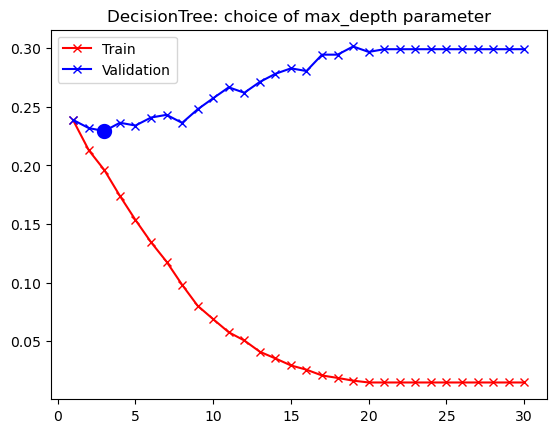

In [53]:
from sklearn.tree import DecisionTreeClassifier

params = {
    "max_depth": [v for v in range(1, 31)],
    "random_state": [12]
}
opt_params, err_train, err_val = k_fold_cross_validation(X_train_scaled, Y_train, model_func=DecisionTreeClassifier, verbose=True, **params)
plot_model_selection_curve(params["max_depth"], err_train, err_val, opt_params["max_depth"])

In [54]:
# Final model for decision tree.
final_decision_tree = DecisionTreeClassifier(**opt_params)
final_decision_tree.fit(X_train_scaled, Y_train)
print("Training error:", 1 - final_decision_tree.score(X_train_scaled, Y_train))

Training error: 0.20327102803738317


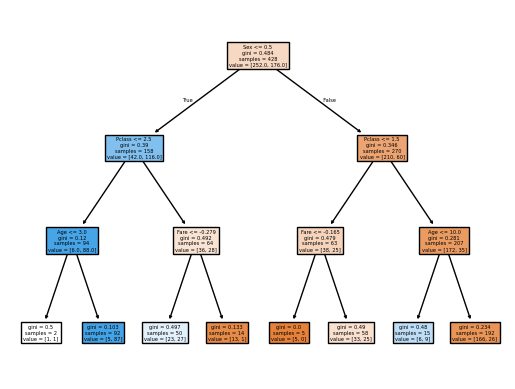

In [55]:
# Plot the tree of the final model.
from sklearn import tree

plt.figure()
tree.plot_tree(decision_tree=final_decision_tree,
               feature_names=features_names, 
               filled=True)
plt.show()

## Train best random forset model

Optimal paramters: {'max_depth': 8, 'random_state': 12}
Min validation error 0.2104097452934662


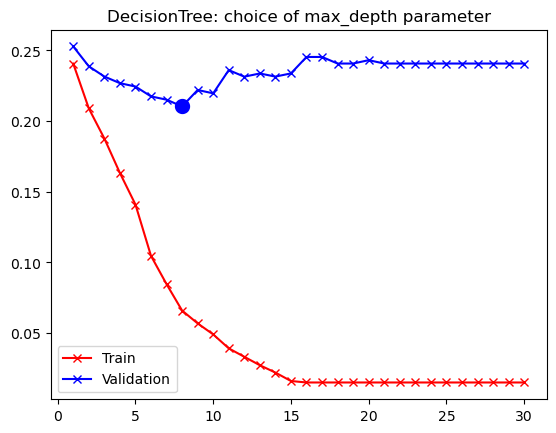

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Find best value for max depth.
params = {
    "max_depth": [v for v in range(1, 31)], 
    "random_state": [12]
}
opt_params, err_train, err_val = k_fold_cross_validation(X_train_scaled, Y_train, model_func=RandomForestClassifier, verbose=True, **params)
plot_model_selection_curve(params["max_depth"], err_train, err_val, opt_params["max_depth"])

In [58]:
# Final model for random forest.
final_random_forest = RandomForestClassifier(**opt_params)
final_random_forest.fit(X_train_scaled, Y_train)
print("Training error:", 1 - final_random_forest.score(X_train_scaled, Y_train))

Training error: 0.07009345794392519


## Best model for SVM model: best model for different kernel functions

Optimal paramters: {'C': 1, 'kernel': 'linear', 'random_state': 12}
Min validation error 0.23870431893687707


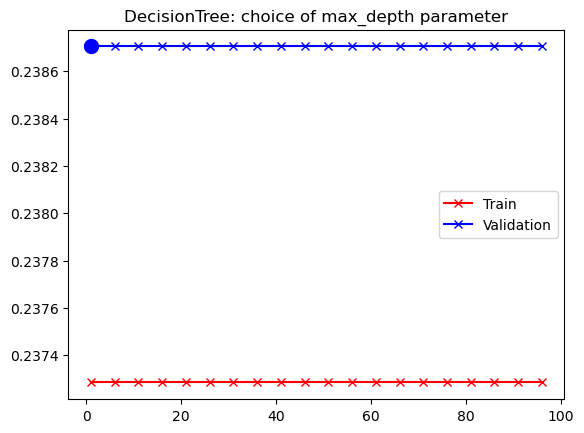

In [61]:
# Find the best SVM with linear kernel.
from sklearn.svm import SVC

params = {
    "C": np.arange(1, 100, 5).tolist(),
    "kernel": ["linear"],
    "random_state": [12]
}
opt_params, err_train, err_val = k_fold_cross_validation(X_train_scaled, Y_train, model_func=SVC, verbose=True, **params)
plot_model_selection_curve(params["C"], err_train, err_val, opt_params["C"])

Mmmh we're not learning anything... with linear kernel.

In [62]:
# Final model for lin svm.
final_lin_svm = SVC(**opt_params)
final_lin_svm.fit(X_train_scaled, Y_train)
print("Training error:", 1 - final_lin_svm.score(X_train_scaled, Y_train))

Training error: 0.23831775700934577


In [63]:
# Train best rbf.
params = {
    "C": np.arange(1, 100, 5).tolist(),
    "kernel": ["rbf"],
    "gamma": [0.01, 0.03, 0.04, 0.05],
    "random_state": [12]
}
opt_params, err_train, err_val = k_fold_cross_validation(X_train_scaled, Y_train, model_func=SVC, verbose=True, **params)

Optimal paramters: {'C': 61, 'kernel': 'rbf', 'gamma': 0.01, 'random_state': 12}
Min validation error 0.20830564784053157


In [64]:
plots = ["gamma", [0.01, 0.03, 0.04, 0.05]]
jump = len(plots[1])

# -- grid of hyperparams into list
param_keys = list(params.keys())
param_values = list(params.values())

# Generate Cartesian product of values
combinations = product(*param_values)
param_list = [dict(zip(param_keys, combination)) for combination in combinations]

plt.figure()
for i in range(jump):
    C_vals = [x["C"] for x in param_list]
    
    plt.plot(C_vals[i::jump], rbf_svm_err_train[i::jump], color='r', marker='x', label=f"Train {plots[0]} {plots[1][i]}")
    plt.plot(C_vals[i::jump], rbf_svm_err_val[i::jump], color='b', marker='x', label=f"Validation {plots[0]} {plots[1][i]}")
    
    plt.scatter(opt_param["C"], np.min(rbf_svm_err_val), color='b', marker='o', linewidths=5, label=f"opt C = {opt_param["C"]}")
    plt.legend()
    plt.xlabel('C')
    plt.ylabel('Error')
    plt.title('SVM: choice of C')
    plt.show()
    plt.close()

NameError: name 'rbf_svm_err_train' is not defined

<Figure size 640x480 with 0 Axes>

In [67]:
# Final model for rbf svm.
final_rbf_svm = SVC(**opt_params)
final_rbf_svm.fit(X_train_scaled, Y_train)
print("Training error:", 1 - final_rbf_svm.score(X_train_scaled, Y_train))

Training error: 0.17523364485981308


In [34]:
# Learn best model for sigmoid
params = {
    "C": np.arange(1, 100, 5).tolist(),
    "kernel": ["sigmoid"],
    "gamma": [0.01, 0.03, 0.04, 0.05],
    "coef0": np.arange(0, 5, 1).tolist(),
    "random_state": [12]
}
opt_param, sig_svm_err_train, sig_svm_err_val = k_fold_cross_validation(X_train_scaled, Y_train, model_func=SVC, **params)
print("\nBest parameters:", opt_param)
print("Min validation error (1 - R²):", np.min(sig_svm_err_val))


Best parameters: {'C': 6, 'kernel': 'sigmoid', 'gamma': 0.05, 'coef0': 3, 'random_state': 12}
Min validation error (1 - R²): 0.1872117400419287


In [35]:
# Train best model for sigmoid kernel.
final_sig_svm = SVC(**opt_param)
final_sig_svm.fit(X_train_scaled, Y_train)
print("1 - R² on training data:", 1 - final_sig_svm.score(X_train_scaled, Y_train))

1 - R² on training data: 0.36329588014981273


In [36]:
# Best params for poly kernel.
params = {
    "C": np.arange(1, 100, 5).tolist(),
    "kernel": ["poly"],
    "degree": [2, 3, 4],
    "gamma": [0.01, 0.03, 0.04, 0.05],
    "coef0": np.arange(0, 1, 1).tolist(),
    "random_state": [12]
}
opt_param, poly_svm_err_train, poly_svm_err_val = k_fold_cross_validation(X_train_scaled, Y_train, model_func=SVC, **params)
print("\nBest parameters:", opt_param)
print("Min validation error (1 - R²):", np.min(poly_svm_err_val))


Best parameters: {'C': 76, 'kernel': 'poly', 'degree': 2, 'gamma': 0.05, 'coef0': 0, 'random_state': 12}
Min validation error (1 - R²): 0.17236198462613556


In [37]:
# Train best model for poly kernel.
final_poly_svm = SVC(**opt_param)
final_poly_svm.fit(X_train_scaled, Y_train)
print("1 - R² on training data:", 1 - final_poly_svm.score(X_train_scaled, Y_train))

1 - R² on training data: 0.1460674157303371


## Deep Neural Network

I'm not good in feature engineering, so... let the network learn the features!

In [38]:
import torch
import torch.nn as nn

In [39]:
batch_size = 5
learning_rate = 0.001

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("device:", device)

device: cuda


In [40]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, X, Y):
        self.features = X
        self.labels = Y
        
    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        features = torch.tensor(self.features[idx], dtype=torch.float32)
        labels = torch.tensor(self.labels[idx], dtype=torch.float32)
        return features, labels

In [41]:
# Define a simple NN.
class NN(nn.Module):
    def __init__(self, layers):
        super(NN, self).__init__()
        torch.manual_seed(12)

        # Define the structure.
        self.layers = nn.ModuleList()
        self.actfunc = nn.ReLU() # Acivaction function.

        for i in range(1, len(layers)):
            self.layers.append(nn.Linear(layers[i-1], layers[i]))
        self.layers.append(nn.Linear(layers[-1], 1)) # Last layer

    def forward(self, x):
        out = x
        for i, layer in enumerate(self.layers):
            out = layer(out)
            if i < len(self.layers) - 1:
                out = self.actfunc(out)
        out = torch.sigmoid(out)
        return out
        

    def fit(self, X, Y, epochs=10, batch_size=5, learning_rate=0.001):
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
        # Crate dataset and dataloader.
        train_ds= MyDataset(X, Y)
        train_loader = torch.utils.data.DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=True)

        # Function cost.
        cost = nn.BCELoss()
        # Optimizier used.
        optimizer = torch.optim.Adam(self.parameters(), lr=0.001)

        # Train the model.
        for _ in range(epochs):
            for i, (x, y) in enumerate(train_loader):
                x = x.to(device)
                y = y.to(device)
        
                # Forward pass: make the prediction.
                outputs = self(x).squeeze(1) # Get predictions.
        
                loss = cost(outputs, y) # Compute the costs.
        
                # Backward and optimize
                optimizer.zero_grad() # Compute the gradient for current batch.
                loss.backward() # Compute back propagation (sensitivity vec)
                optimizer.step() # Update the weights.

    
    def score(self, X, Y, batch_size=5):
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

        # Crate dataset and dataloader.
        train_ds= MyDataset(X, Y)
        train_loader = torch.utils.data.DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=True)
        
        with torch.no_grad(): # Do not compute gradients.
            correct = 0
            total = 0
            for x, y in train_loader:
                # Move data to GPU.
                x = x.to(device)
                y = y.to(device)
        
                # Predict output.
                outputs = self(x).squeeze(1)
                outputs = (outputs >= 0.5).float()
                
                # Check if prediction is correct.
                total += y.size(0)
                correct += (outputs == y).sum().item()
            return correct / total

In [42]:
# Define a simple neural network.
layers = {"layers": [len(features_names), 4, 4, 4]}
nn_model = NN(**layers).to(device)
print("NN structure:\n", nn_model)

NN structure:
 NN(
  (layers): ModuleList(
    (0): Linear(in_features=7, out_features=4, bias=True)
    (1-2): 2 x Linear(in_features=4, out_features=4, bias=True)
    (3): Linear(in_features=4, out_features=1, bias=True)
  )
  (actfunc): ReLU()
)


In [43]:
nn_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=1)
print("Training error:", 1 - nn_model.score(X_train_scaled, Y_train, batch_size=1))
print("Validation error:", 1 - nn_model.score(X_val_scaled, Y_val, batch_size=1))

Training error: 0.20037453183520604
Validation error: 0.2528089887640449


In [44]:
def k_fold_cross_validation_nn(X, Y, num_folds = 5, batch_size = 1, epochs = 10, **param_grid):

    # -- grid of hyperparams into list
    param_keys = list(param_grid.keys())
    param_values = list(param_grid.values())
    
    # Generate Cartesian product of values
    combinations = product(*param_values)
    
    # Create a list of dictionaries from combinations
    param_list = [dict(zip(param_keys, combination)) for combination in combinations]

    kf = KFold(n_splits = num_folds)
    
    err_validation_kfold = np.zeros(len(param_list),)
    err_training_kfold = np.zeros(len(param_list),)

    for i, params in enumerate(param_list):

        model = NN(**params).to(device)

        for train_index, validation_index in kf.split(X):
            X_train_kfold, X_val_kfold = X[train_index], X[validation_index]
            Y_train_kfold, Y_val_kfold = Y[train_index], Y[validation_index]
            
            # -- data scaling: standardize features with respect to the current folds
            scaler_kfold = StandardScaler().fit(X_train_kfold)
            X_train_kfold_scaled = scaler_kfold.transform(X_train_kfold)
            X_val_kfold_scaled = scaler_kfold.transform(X_val_kfold)

            model.fit(X_train_kfold_scaled, Y_train_kfold, epochs=epochs, batch_size=batch_size)
        
            # -- incremental mean
            err_training_kfold[i] += (1.0 - model.score(X_train_kfold_scaled, Y_train_kfold))
            err_validation_kfold[i] += (1.0 - model.score(X_val_kfold_scaled, Y_val_kfold))

    
    # -- compute the mean
    err_training_kfold /= num_folds
    err_validation_kfold /= num_folds
    
    # -- choose the best paramter: the one that minimizes the (the estimation of the true) loss
    best_param = param_list[np.argmin(err_validation_kfold)]

    return best_param, err_training_kfold, err_validation_kfold

In [45]:
in_layer = len(features_names)
params = {
    "layers": [[in_layer, x] for x in range(1, 15)]
}
opt_layers, nn_err_train, nn_err_val = k_fold_cross_validation_nn(X_train_scaled, Y_train, **params)
print("Optimal layers:", opt_layers)
print("Min validation error (1 - R²):", np.min(nn_err_val))

Optimal layers: {'layers': [7, 12]}
Min validation error (1 - R²): 0.159213542585082


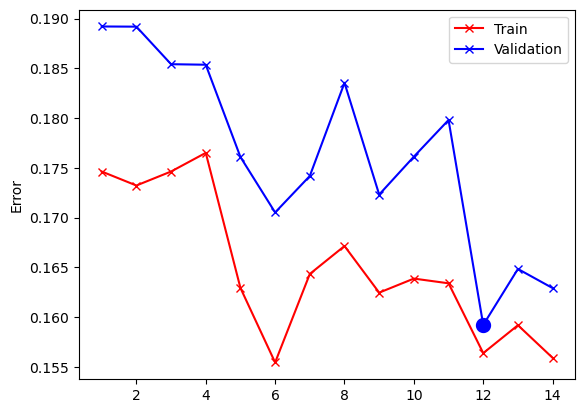

In [46]:
# -- plot the training error
plt.plot(range(1, 15),
         nn_err_train, 
         color='r', 
         marker='x')

# -- plot the validation error
plt.plot(range(1, 15),
         nn_err_val, 
         color='b', 
         marker='x')

# -- highlight min loss
plt.scatter(opt_layers["layers"][1], 
            np.min(nn_err_val), 
            color='b', 
            marker='o', 
            linewidths=5)

plt.legend(['Train', 'Validation'])
plt.ylabel('Error')
plt.show()

In [47]:
# Final model for NN with only one hidden layer.
final_nn_1h = NN(**opt_layers).to(device)
final_nn_1h.fit(X_train_scaled, Y_train, epochs=500, batch_size=1)
print("Training error:", 1 - final_nn_1h.score(X_train_scaled, Y_train, batch_size=1))

Training error: 0.1460674157303371


In [48]:
# Neural network with 3 hidden layers.
params = {
    "layers": [[in_layer, x, x, x] for x in range(1, 15)]
}
opt_layers, nn3_err_train, nn3_err_val = k_fold_cross_validation_nn(X_train_scaled, Y_train, **params)
print("Optimal layers:", opt_layers)
print("Min validation error (1 - R²):", np.min(nn_err_val))

Optimal layers: {'layers': [7, 11, 11, 11]}
Min validation error (1 - R²): 0.159213542585082


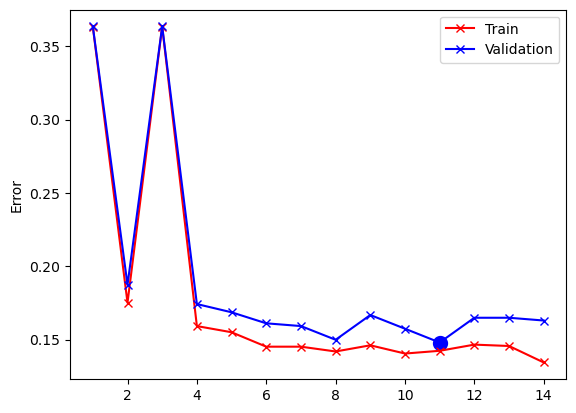

In [49]:
# -- plot the training error
plt.plot(range(1, 15),
         nn3_err_train, 
         color='r', 
         marker='x')

# -- plot the validation error
plt.plot(range(1, 15),
         nn3_err_val, 
         color='b', 
         marker='x')

# -- highlight min loss
plt.scatter(np.argmin(nn3_err_val) + 1,
            np.min(nn3_err_val), 
            color='b', 
            marker='o', 
            linewidths=5)

plt.legend(['Train', 'Validation'])
plt.ylabel('Error')
plt.show()

In [50]:
# Final model for NN with 3 hidden layer (with same size).
final_nn_3h = NN(**opt_layers).to(device)
final_nn_3h.fit(X_train_scaled, Y_train, epochs=500, batch_size=1)
print("Training error:", 1 - final_nn_3h.score(X_train_scaled, Y_train, batch_size=1))

Training error: 0.1235955056179775


## Compare final models using validation set

In [51]:
val_errors = {}

val_errors["decision tree"] = 1 - final_decision_tree.score(X_val_scaled, Y_val)
print("Validation error decision tree:", val_errors["decision tree"])

val_errors["random forest"] = 1 - final_random_forest.score(X_val_scaled, Y_val)
print("Validation error random forest:", val_errors["random forest"])

val_errors["lin svm"] = 1 - final_lin_svm.score(X_val_scaled, Y_val)
print("Validation error linear svm:", val_errors["lin svm"])

val_errors["rbf svm"] = 1 - final_rbf_svm.score(X_val_scaled, Y_val)
print("Validation error rbf svm:", val_errors["rbf svm"])

val_errors["sig svm"] = 1 - final_sig_svm.score(X_val_scaled, Y_val)
print("Validation error sigmoid svm:", val_errors["sig svm"])

val_errors["poly svm"] = 1 - final_poly_svm.score(X_val_scaled, Y_val)
print("Validation error poly svm", val_errors["poly svm"])

val_errors["nn 1h"] = 1 - final_nn_1h.score(X_val_scaled, Y_val)
print("Validation error nn 1h", val_errors["nn 1h"])

val_errors["nn 3h"] = 1 - final_nn_3h.score(X_val_scaled, Y_val)
print("Validation error nn 3h", val_errors["nn 3h"])

best_model_name = min(val_errors, key=val_errors.get)
print("\nBest model:", best_model_name)

Validation error decision tree: 0.1629213483146067
Validation error decision tree: 0.1741573033707865
Validation error linear svm: 0.2415730337078652
Validation error rbf svm: 0.2078651685393258
Validation error sigmoid svm: 0.3876404494382022
Validation error poly svm 0.202247191011236
Validation error nn 1h 0.2191011235955056
Validation error nn 3h 0.2134831460674157

Best model: decision tree


## Final best model

In [52]:
final_model = None
if best_model_name == "decision tree":
    final_model = final_decision_tree
elif best_model_name == "random forest":
    final_model = final_random_forest
elif best_model_name == "rbf svm":
    final_model = final_rbf_svm
elif best_model_name == "sig svm":
    final_model = final_sig_svm
elif best_model_name == "lin svm":
    final_model = final_lin_svm
elif best_model_name == "poly svm":
    final_model = final_poly_svm
elif best_model_name == "nn 1h":
    final_model = final_nn_1h
elif best_model_name == "nn 3h":
    final_model = final_nn_3h

print(best_model_name)
final_model.fit(X_train_val_scaled, Y_train_val)
print(1 - final_model.score(X_test_scaled, Y_test))

decision tree
0.2178770949720671


## Predictions on test set

In [53]:
df = pd.read_csv('test.csv', sep=',')

# Drop id, name columns.
df = df.drop(columns=["Name", "Cabin", "Ticket"], axis=1)

df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
#df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Age'] = df['Age'].fillna(df['Age'].mode().iloc[0])

print(df.isna().sum())
df = df.dropna()

X_test = df[features_names]
print(X_test)

X_test = np.array(X_test)

X_test[:, encode_cols] = enc.fit_transform(X_test[:, encode_cols])
X_test[:, cont_var_col] = scaler.transform(X_test[:, cont_var_col])

X_test = np.array(X_test, dtype=np.float32)

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
     Pclass     Sex   Age  SibSp  Parch      Fare Embarked
0         3    male  34.5      0      0    7.8292        Q
1         3  female  47.0      1      0    7.0000        S
2         2    male  62.0      0      0    9.6875        Q
3         3    male  27.0      0      0    8.6625        S
4         3  female  22.0      1      1   12.2875        S
..      ...     ...   ...    ...    ...       ...      ...
413       3    male  21.0      0      0    8.0500        S
414       1  female  39.0      0      0  108.9000        C
415       3    male  38.5      0      0    7.2500        S
416       3    male  21.0      0      0    8.0500        S
417       3    male  21.0      1      1   22.3583        C

[418 rows x 7 columns]


In [54]:
# Get predictions.
predictions = final_model.predict(X_test)

# Save predictions.
output = pd.DataFrame({'PassengerId': df.PassengerId, 'Survived': predictions}) 
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
